In [1]:
# (1) Importing the Libraries;

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# (2) Importing DataSet;

data = pd.read_csv("Kidney_Problem.csv")

In [3]:
# (3) Shape of Initial Dataset (Row, Column);

data.shape

(400, 26)

In [4]:
# (4) Heads of Table;

data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# (5) Count the empty (NaN, NAN, na) values in each column;

data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
# (6) Look at the Data Types;

data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [7]:
# (7) Info about Data;

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
data.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_11424\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


In [9]:
# (5) Count the empty (NaN, NAN, na) values in each column;

data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
# (6) Look at the Data Types;

data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [11]:
# (7) Describe the Data;

data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [12]:
# (8)

data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [13]:
# (9)

data.classification = data.classification.replace("ckd\t","ckd")

In [14]:
# (10)

data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [15]:
# (11) Drop the Column "id";

data = data.drop('id', axis = 1)

In [16]:
# (12) Shape of the Dataset after dropping column "id";

data.shape

(400, 25)

In [17]:
# (13)

data['classification'] = data['classification'].replace(['ckd','notckd'],[1,0])

In [18]:
# (14)

data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [19]:
# (15) Before Dropping all NaN values; [Row, Column]

print("Before dropping all NaN values ---->",data.shape)

Before dropping all NaN values ----> (400, 25)


In [20]:
# (16) After Dropping all NaN values; [Row, Column]

df = data.dropna(axis = 0)

print(f"After dropping all NaN values------>{df.shape}")

After dropping all NaN values------>(158, 25)


In [21]:
# (17)

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [22]:
# (18)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [23]:
# (21)

for i in df['wc']:
    print(i)

6700
12100
4500
11000
9200
6900
9600
18900
7200
14600
6400
	6200
3800
9800
12500
5600
7000
15200
5000
16300
	8400
10500
15200
14600
7900
10900
12800
12400
19100
7500
16700
9600
26400
9800
8800
7400
12000
7500
15700
11500
5000
10200
5400
10400
9800
9100
6200
8300
9200
10700
9100
8400
4300
9400
5600
7200
8600
5000
10500
6800
9500
6900
7200
9000
5600
4700
6300
9400
5800
9100
5500
6700
5300
9800
7100
7000
10200
6300
8600
11000
7200
6200
9100
4300
7900
6900
11000
7500
8200
9400
8100
7000
10400
9600
7800
6700
8300
10700
7800
6700
4300
10700
7500
4700
7000
6700
7300
7700
5500
8100
7900
7200
7300
9900
7000
5800
6800
6300
7400
11000
5200
6000
5800
5400
10300
9300
10500
6700
9400
10300
9300
6500
10500
9200
8000
9700
9100
6400
5400
6500
6000
5100
11000
8000
5700
6200
9500
7200
6300
5800
6600
7400
9500
6700
7800
6600
7200
6800


In [24]:
# (22) Replacing "t6200" by "8400";

df['wc'] = df['wc'].replace(["\t6200","\t8400"],[6200,8400])

C:\Users\User\AppData\Local\Temp\ipykernel_11424\2379007731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wc'] = df['wc'].replace(["\t6200","\t8400"],[6200,8400])


In [25]:
# (23)

for i in df['wc']:
    print(i)

6700
12100
4500
11000
9200
6900
9600
18900
7200
14600
6400
6200
3800
9800
12500
5600
7000
15200
5000
16300
8400
10500
15200
14600
7900
10900
12800
12400
19100
7500
16700
9600
26400
9800
8800
7400
12000
7500
15700
11500
5000
10200
5400
10400
9800
9100
6200
8300
9200
10700
9100
8400
4300
9400
5600
7200
8600
5000
10500
6800
9500
6900
7200
9000
5600
4700
6300
9400
5800
9100
5500
6700
5300
9800
7100
7000
10200
6300
8600
11000
7200
6200
9100
4300
7900
6900
11000
7500
8200
9400
8100
7000
10400
9600
7800
6700
8300
10700
7800
6700
4300
10700
7500
4700
7000
6700
7300
7700
5500
8100
7900
7200
7300
9900
7000
5800
6800
6300
7400
11000
5200
6000
5800
5400
10300
9300
10500
6700
9400
10300
9300
6500
10500
9200
8000
9700
9100
6400
5400
6500
6000
5100
11000
8000
5700
6200
9500
7200
6300
5800
6600
7400
9500
6700
7800
6600
7200
6800


In [26]:
# (24)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [42]:
# (25)

df['pcv'] = df['pcv'].astype(int)
df['wc']  = df['wc'].astype(int)
df['rc']  = df['rc'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    int64  
 6   pc              158 non-null    int64  
 7   pcc             158 non-null    int64  
 8   ba              158 non-null    int64  
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    int32  
 16  wc              158 non-null    int32  
 17  rc              158 non-null    flo

In [48]:
# (26)

object_dtypes = df.select_dtypes(include = 'object')
object_dtypes.head()

""
3
9
11
14
20


In [49]:
# (27) Create a Dictionary for all String Value;

dictionary = {
    
         "rbc": {
         "abnormal":1,
         "normal" : 0,
         },
        
         "pc": {
         "abnormal": 1,
         "normal": 0,
         },
       
        "pcc": {
        "present":1,
        "notpresent": 0,
        },
    
        "ba": {
        "notpresent": 0,
        "present": 1,
        },
    
        "htn": {
        "yes": 1,
        "no": 0,
        },
    
        "dm": {
        "yes": 1,
        "no": 0,
        },
    
       "cad": {
       "yes": 1,
       "no": 0,
       },
    
      "appet":{
      "good": 1,
      "poor": 0,
      },
    
    "pe": {
    "yes": 1,
    "no": 0,
    },
    
    "ane": {
    "yes": 1,
    "no": 0,
    }
}

In [50]:
# (28) Replace the String values with Dictionary;

df = df.replace(dictionary)

In [51]:
# (29) After replacement with Dictionary;

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


<Axes: title={'center': 'Persons correlation of Kidnney Disease Features'}>

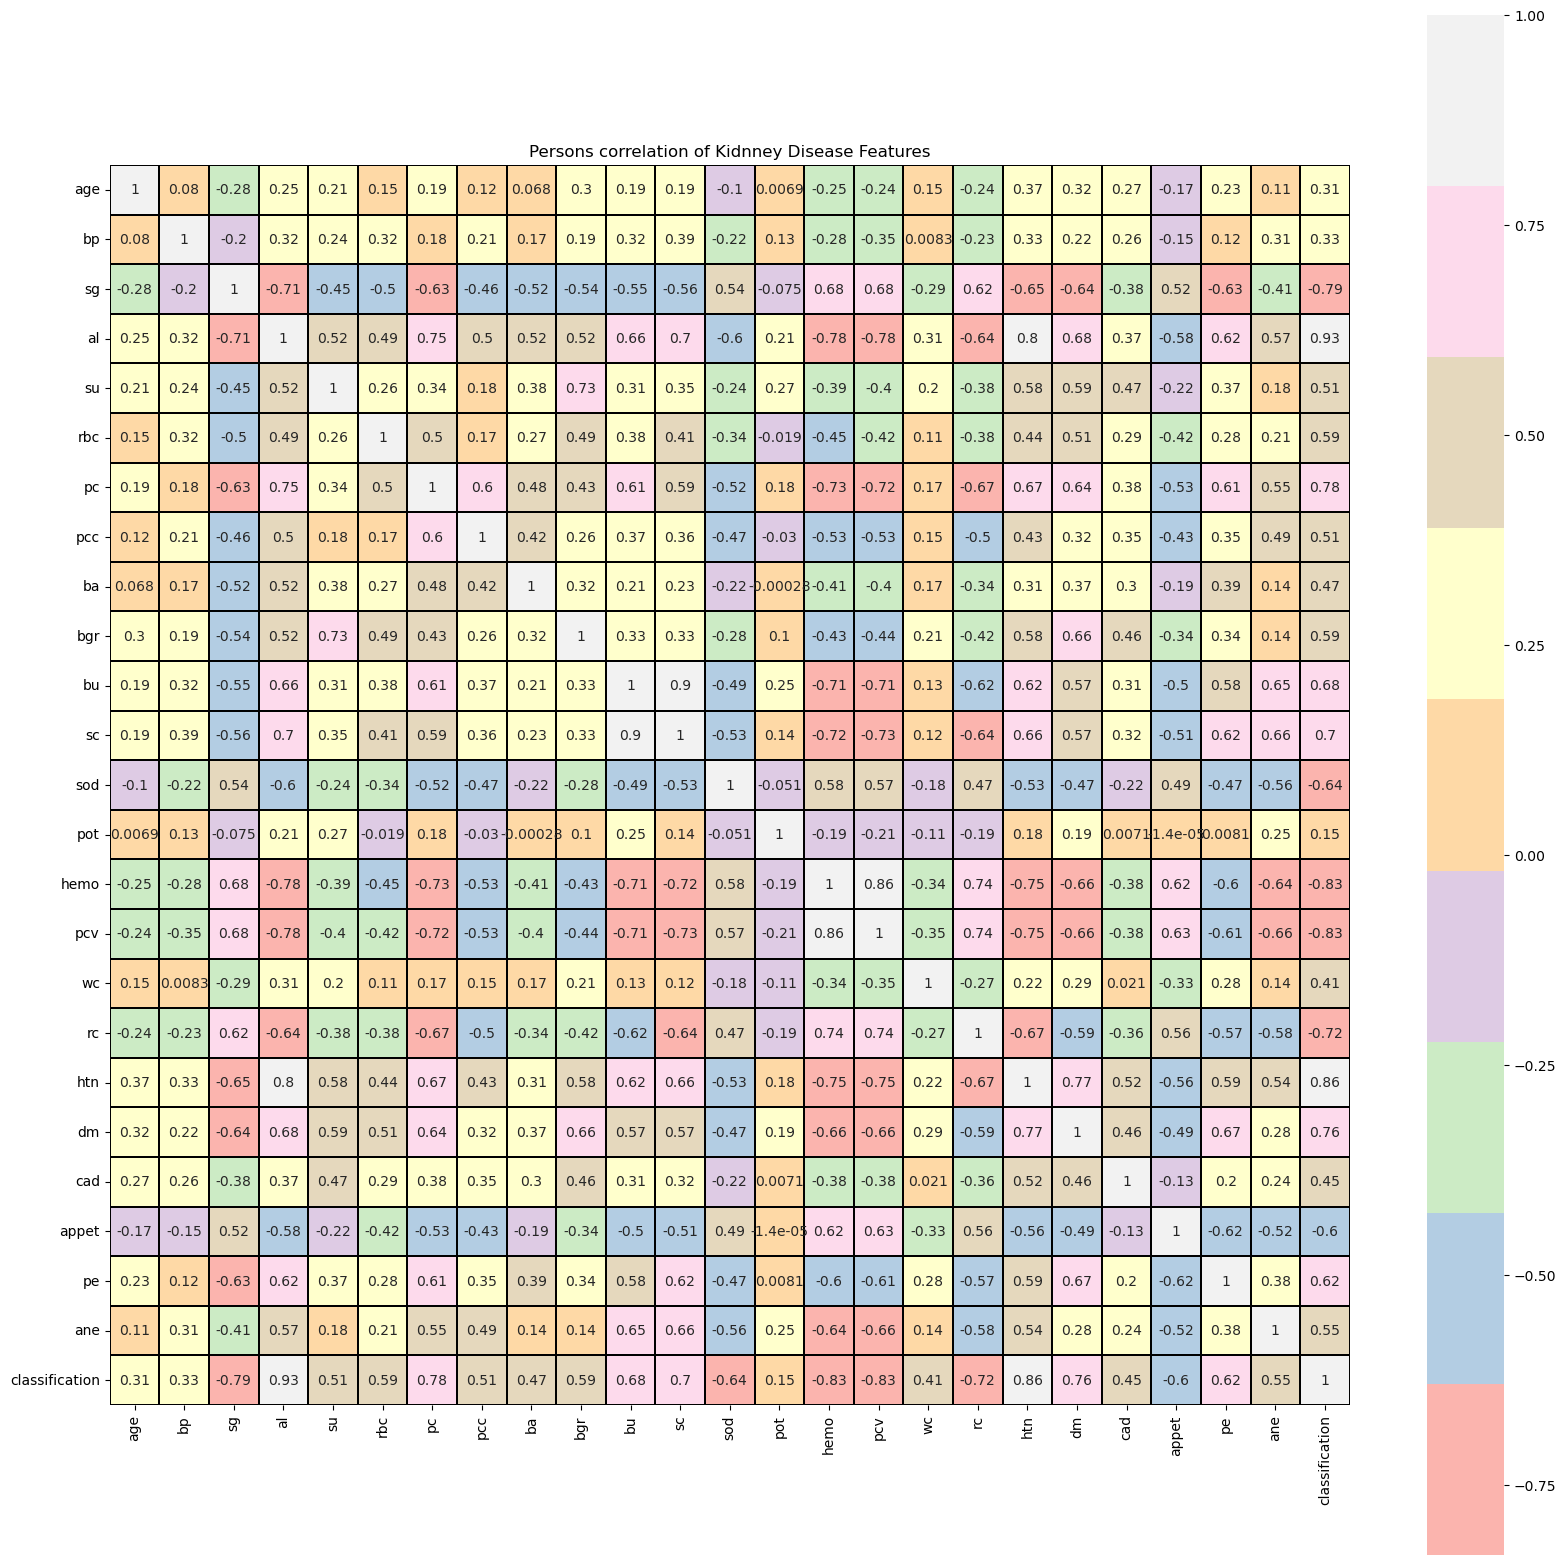

In [52]:
# (30) Set up the matplotlib figure & Draw the Heatmap using seaborn;

plt.figure(figsize=(20,20))
plt.title('Persons correlation of Kidnney Disease Features')

sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0,square=True,
           cmap="Pastel1", linecolor='black',annot=True)

In [72]:
# (31) Dropping some Columns;

x = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'],axis = 1)

y = df['classification']

In [73]:
# (32) After Dropping;

x.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [76]:
# (33) Spliting the DataSet into Training Set & Test Set;

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [77]:
# (35) Logistic Regression;

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0)

LR.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [78]:
# (36) KNeighbors Classifier;

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)

KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
# (37) SVM (Support Vector Mechanism);

from sklearn.svm import SVC

SVM_L = SVC(kernel='linear', random_state = 0)

SVM_L.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [80]:
# (38) Naive Bayes Algorithm using GaussianNB;

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [81]:
# (39) Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier(random_state = 0)
DTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [82]:
# (40) Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state = 0)
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [86]:
# (41) Data Prediction;

y_pred_1 = LR.predict(x_test)

y_pred_3 = SVM_L.predict(x_test)

y_pred_4 = NB.predict(x_test)

y_pred_5 = DTree.predict(x_test)

y_pred_6 = RFC.predict(x_test)

In [87]:
# (18) Accuracy and Confusion Matrix;

ACY1 = accuracy_score(y_test, y_pred_1)
print("Accuracy for Logistic Regression =>",100*ACY1,"%")
CFM1 = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix for Logistic Regression =>")
print(CFM1)

print("--------------------------------------------------")

ACY3 = accuracy_score(y_test, y_pred_3)
print("Accuracy for SVM =>",100*ACY3,"%")

CFM3 = confusion_matrix(y_test, y_pred_3)
print("Confusion Matrix for SVM =>")

print(CFM3)

print("--------------------------------------------------")

ACY4 = accuracy_score(y_test, y_pred_4)
print("Accuracy for Naive Bayes Algorithm =>",100*ACY4,"%")

CFM4 = confusion_matrix(y_test, y_pred_4)
print("Confusion Matrix for Naive Bayes Algorithm =>")

print(CFM4)

print("--------------------------------------------------")

ACY5 = accuracy_score(y_test, y_pred_5)
print("Accuracy for Dicision Tree Classifier =>",100*ACY5,"%")

CFM5 = confusion_matrix(y_test, y_pred_5)
print("Confusion Matrix Dicision Tree Classifier =>")

print(CFM5)

print("--------------------------------------------------")

ACY6 = accuracy_score(y_test, y_pred_6)
print("Accuracy for Random Forest Classifier =>",100*ACY6,"%")

CFM6 = confusion_matrix(y_test, y_pred_6)
print("Confusion Random Forest Classifier =>")

print(CFM6)

print("--------------------------------------------------")

Accuracy for Logistic Regression => 97.91666666666666 %
Confusion Matrix for Logistic Regression =>
[[35  0]
 [ 1 12]]
--------------------------------------------------
Accuracy for SVM => 97.91666666666666 %
Confusion Matrix for SVM =>
[[35  0]
 [ 1 12]]
--------------------------------------------------
Accuracy for Naive Bayes Algorithm => 100.0 %
Confusion Matrix for Naive Bayes Algorithm =>
[[35  0]
 [ 0 13]]
--------------------------------------------------
Accuracy for Dicision Tree Classifier => 97.91666666666666 %
Confusion Matrix Dicision Tree Classifier =>
[[35  0]
 [ 1 12]]
--------------------------------------------------
Accuracy for Random Forest Classifier => 100.0 %
Confusion Random Forest Classifier =>
[[35  0]
 [ 0 13]]
--------------------------------------------------


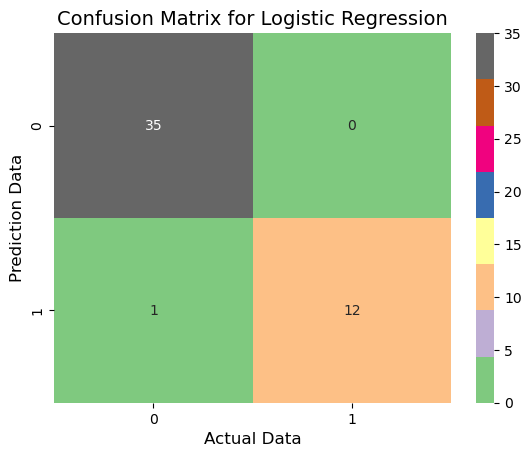

-------------------------------------------------------------------


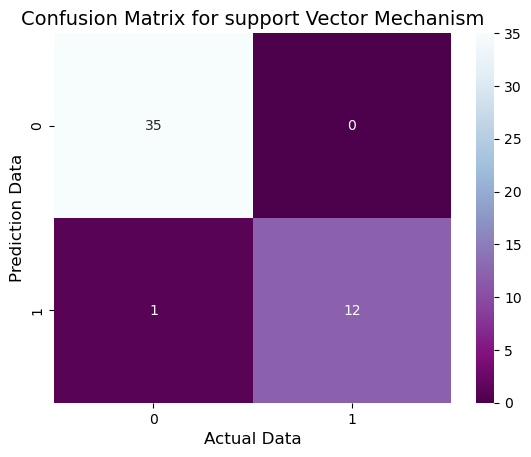

-------------------------------------------------------------------


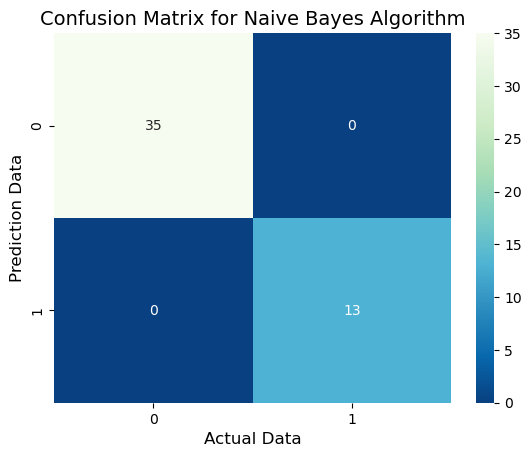

-------------------------------------------------------------------


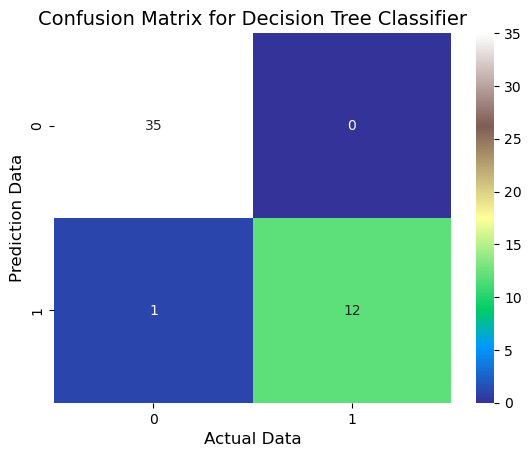

-------------------------------------------------------------------


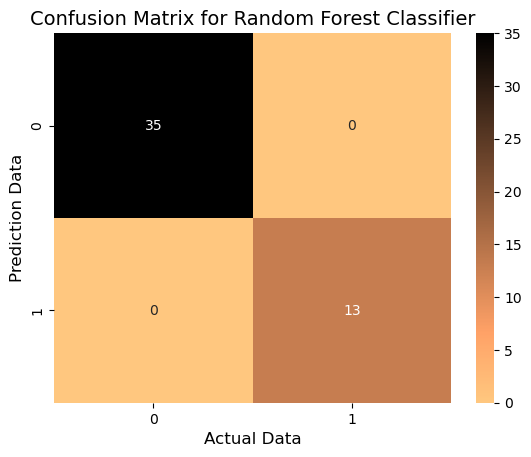

-------------------------------------------------------------------


In [88]:
# (42) Visualization of All Confusion Matrices;

sns.heatmap(CFM1, annot=True, fmt='g', cmap='Accent')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for Logistic Regression',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

sns.heatmap(CFM3, annot=True, fmt='g', cmap='BuPu_r')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for support Vector Mechanism',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

sns.heatmap(CFM4, annot=True, fmt='g', cmap='GnBu_r')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for Naive Bayes Algorithm',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

sns.heatmap(CFM5, annot=True, fmt='g', cmap='terrain')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for Decision Tree Classifier',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

sns.heatmap(CFM6, annot=True, fmt='g', cmap='copper_r')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for Random Forest Classifier',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

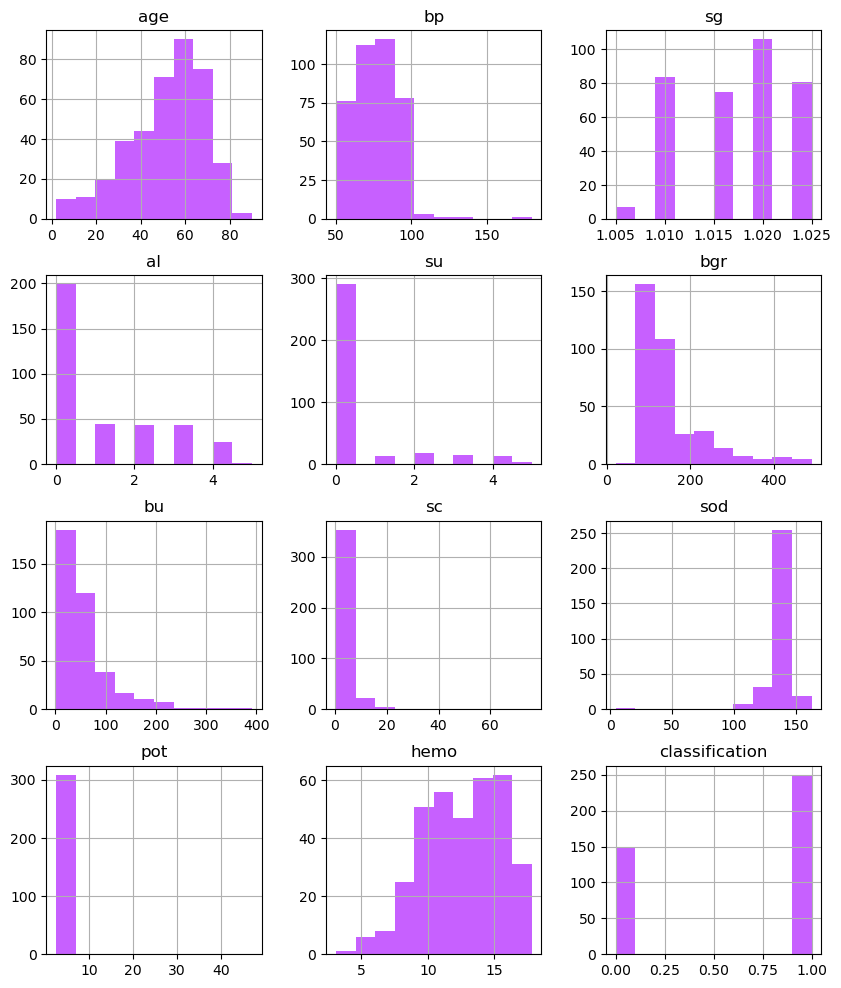

In [89]:
# (43) Visualisation in Histogram;

data.hist(bins=10, figsize=(10,12),color='xkcd:bright lavender')
plt.show()

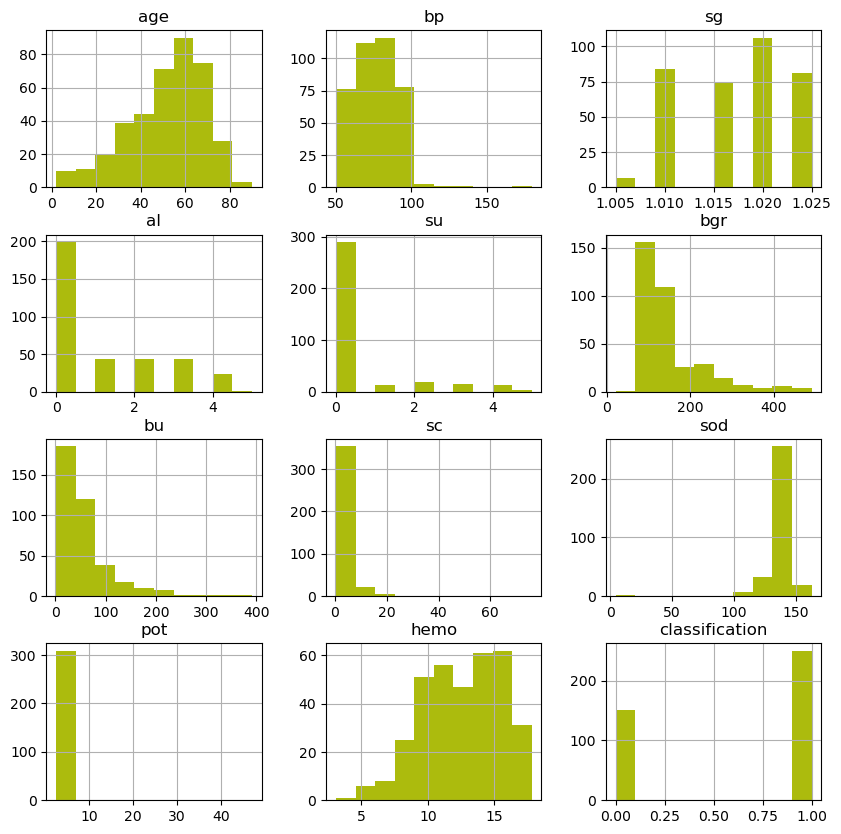

In [90]:
# (44) Visualisation in Histogram (Initial Dataset);

data.hist(bins=10, figsize=(10,10),color='xkcd:snot')
plt.show()